# RunAge - Defesa Lucas Santana

> [Laboratory of Biomechanics and Motor Control](http://demotu.org/)  
> Federal University of ABC, Brazil

## Importando bibliotecas e funções

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sys, os
sys.path.insert(1, r'./../functions')
from detect_onset import detect_onset
from invdyn3d import invdyn3d

## Dados sobre o sujeito 

In [2]:
# Massa total do sujeito(kg)
M = 61.05
# Massa do pé do sujeito (kg)
m_foot = 0.8363849999999999

## Importando os dados

###### As variáveis utilizadas neste notebook possuem as seguintes definições:
* VUDd: Velocidade do componente distal. Para mais detalhes sobre o cálculo, veja [1]
* Fgrf: Força de reação do solo
* Mfree: Momento livre
* omega_shankGlobal: Velocidade angular 
* deltaVGlobal: Velocidade na articulação do tornozelo, obtida pela subtração da velocidade no tornozelo devido ao efeito do pé pela velocidade no tornozelo devido ao efeito da perna        
* VcopGlobal: Velocidade de deformação do ponto distal do pé. Para mais detalhes sobre o cálculo, veja [1]         
* omega_footGlobal: Veloidade angular pé no sistema de coordenadas global       
* vcm_foot:  Velocidade do centro de massa do pé      
* rcm_foot: Posição do centro de massa do pé       
* cop_position: Posição do centro de pressão       
* r_shank_dis: Posição distal da perna        
* acm_foot: Aceleração do centro de massa        
* alpha_footGlobal: Aceleração angular do pé        
* I_foot:  Momento de inércia do pé em 3 dimensões       
* e1_foot: Versor do pé no eixo i       
* e2_foot: Versor do pé no eixo j      
* e3_foot: Versor do pé no eixo k 

In [3]:
VUDd = np.loadtxt('../data/VUDd.txt', delimiter=',')
Fgrf = np.loadtxt('../data/Fgrf.txt', delimiter=',')
Mfree = np.loadtxt('../data/Mfree.txt', delimiter=',')
omega_shankGlobal = np.loadtxt('../data/omega_shankGlobal.txt', delimiter=',')
deltaVGlobal = np.loadtxt('../data/deltaVGlobal.txt', delimiter=',')
VcopGlobal = np.loadtxt('../data/VcopGlobal.txt', delimiter=',')
omega_footGlobal = np.loadtxt('../data/omega_footGlobal.txt', delimiter=',')
vcm_foot = np.loadtxt('../data/vcm_foot.txt', delimiter=',')
rcm_foot = np.loadtxt('../data/rcm_foot.txt', delimiter=',')
cop_position = np.loadtxt('../data/cop_position.txt', delimiter=',')
r_shank_dis = np.loadtxt('../data/r_shank_dis.txt', delimiter=',')
acm_foot = np.loadtxt('../data/acm_foot.txt', delimiter=',')
alpha_footGlobal = np.loadtxt('../data/alpha_footGlobal.txt', delimiter=',')
I_foot = np.loadtxt('../data/I_foot.txt', delimiter=',')
e1_foot = np.loadtxt('../data/e1_foot.txt', delimiter=',')
e2_foot = np.loadtxt('../data/e2_foot.txt', delimiter=',')
e3_foot = np.loadtxt('../data/e3_foot.txt', delimiter=',')

## Potência mecânica utilizando o modelo do segmento distal

A potência total do segmento UD é a soma da "potência de translação" com  a "potência de rotação", em que essa última utiliza o momento livre e a velocidade angular da perna

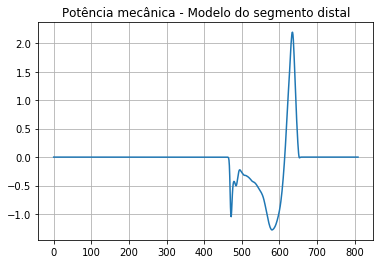

In [4]:
aux1 = np.sum(Fgrf[0:len(VUDd)]*VUDd, axis=1)
aux2 = np.sum(Mfree[0:len(omega_shankGlobal)]*omega_shankGlobal, axis=1)
PUD = aux1 + aux2

if 1:
    plt.figure()
    plt.title('Potência mecânica - Modelo do segmento distal')
    plt.plot(PUD/M)
    plt.grid()
    plt.show()

## Dinâmica Inversa

A dinâmica inversa foi calculada através de uma função denominada "invdyn3d", que fornece a força e torque no tornozelo.

In [5]:
Fp_ankle, Mp_ankle = invdyn3d(rcm_foot, cop_position, r_shank_dis, acm_foot, alpha_footGlobal, omega_footGlobal,m_foot, I_foot, Fgrf, Mfree, e1_foot, e2_foot, e3_foot)

## Potência mecânica do tornozelo, potência do pé e potência mecânica total

A forma mais completa de se obter a potência por meio da dinâmica inversa é pela soma da potência do tornozelo obtida com um modelo de 6 graus de liberdade com a potência no pé.

#### Velocidade angular

Para obter a velocidade angular no tornozelo, foi feita a subtração da velocidade angular no pé pela velocidade angular na perna

In [6]:
omega_ankleGlobal = omega_footGlobal - omega_shankGlobal

### Potência mecânica do tornozelo (Pankle)

A potência no tornozelo foi obtida utilizando os modelo de 6 graus de liberdade para os cálculos, somando a potência de translação com a potência de rotação

In [7]:
Pankle = np.sum(Mp_ankle[0:len(Fgrf)]*omega_ankleGlobal[0:len(Fgrf)], axis=1) + \
       np.sum(Fp_ankle[0:len(Fgrf)]*deltaVGlobal[0:len(Fgrf)], axis=1)

p1 = np.sum(Mp_ankle[0:len(Fgrf)]*omega_ankleGlobal[0:len(Fgrf)], axis=1)
p2 = np.sum(Fp_ankle[0:len(Fgrf)]*deltaVGlobal[0:len(Fgrf)], axis=1)

### Potência mecânica do pé (Pfoot)

A potência no pé foi obtida pela soma dos produtos entre a força de reação do solo com a velocidade do centro de pressão com o produto do momento livre com a velocidade angular.

In [8]:
Pfoot = np.sum(Fgrf*VcopGlobal[0:len(Fgrf)], axis=1) + \
       np.sum(Mfree[0:len(Fgrf)]*omega_footGlobal[0:len(Fgrf)], axis=1)

### Potência mecânica total (Psum)

Ambas as potências obtidas anteriormente foram somadas para se obter a potência total

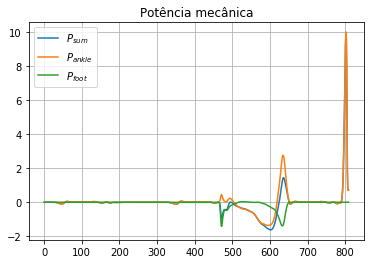

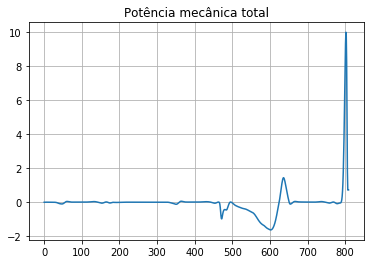

In [9]:
Pankle = Pankle/M
Pfoot = Pfoot/M
Psum = Pankle + Pfoot

if 1:
    plt.figure()
    plt.plot(Psum)
    plt.plot(Pankle)
    plt.plot(Pfoot)
    plt.legend(('$P_{sum}$','$P_{ankle}$','$P_{foot}$'))
    plt.title(('Potência mecânica'))
    #plt.show()
    plt.grid()

if 1:
    plt.figure()
    plt.plot(Psum)
    plt.title(('Potência mecânica total'))
    #plt.show()
    plt.grid()

## Normalizando as curvas pela fase de apoio

In [10]:
# Detect events
inds= detect_onset(Fgrf[:,1], 20, n_above=10, n_below=0, show=False)
#Psum
xx_Psum = Psum[inds[0][0]:inds[0][1]]
time_Psum  = np.linspace(0, 100, len(xx_Psum))  # time vector for the original data
timen_Psum = np.linspace(0, 100, 101)     # new time vector for the new time-normalized data
Psum2 = np.interp(timen_Psum, time_Psum, xx_Psum)
#Pfoot
xx_Pfoot = Pfoot[inds[0][0]:inds[0][1]]
time_Pfoot  = np.linspace(0, 100, len(xx_Pfoot))  # time vector for the original data
timen_Pfoot = np.linspace(0, 100, 101)     # new time vector for the new time-normalized data
Pfoot2 = np.interp(timen_Pfoot, time_Pfoot, xx_Pfoot)
#Psum
xx_Pankle = Pankle[inds[0][0]:inds[0][1]]
time_Pankle  = np.linspace(0, 100, len(xx_Pankle))  # time vector for the original data
timen_Pankle = np.linspace(0, 100, 101)     # new time vector for the new time-normalized data
Pankle2 = np.interp(timen_Pankle, time_Pankle, xx_Pankle)

## Plotando as curvas normalizadas

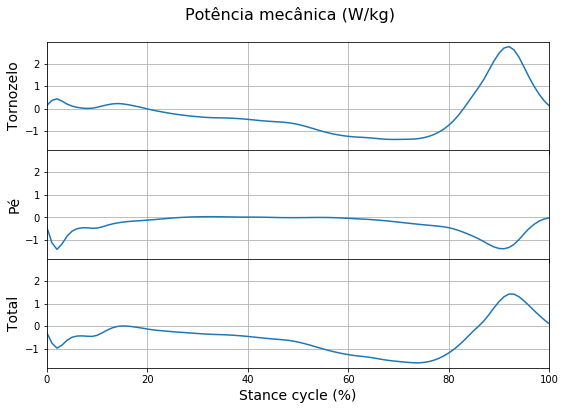

In [11]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(9, 6), 
                        gridspec_kw={'hspace': 0})
plt.suptitle('Potência mecânica (W/kg)', y=.96, fontsize=16)
axs[0].plot(timen_Pankle, Pankle2)
axs[0].set_xlim([0, 100])
axs[1].plot(timen_Pankle, Pfoot2)
axs[2].plot(timen_Pankle, Psum2)
plt.xlabel('Stance cycle (%)', fontsize=14)
labels = ['Tornozelo', 'Pé', 'Total']
for ax, label in zip(axs, labels):
    ax.grid()
    ax.label_outer()
    ax.set_ylabel(label, fontsize=14)

# References

[1] Takahashi, K. Z., Kepple, T. M., & Stanhope, S. J. (2012). A unified deformable (UD) segment model for quantifying total power of anatomical and prosthetic below-knee structures during stance in gait. Journal of Biomechanics, 45(15), 2662–2667. http://doi.org/10.1016/j.jbiomech.2012.08.017